In [1]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./core/Pitching.csv')

In [3]:
pd.options.display.max_columns = None

In [4]:
df.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,0,0,78,43,23,0,11,1,NaN,7.96,NaN,7,NaN,0,146.0,0,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,0,0,792,361,132,4,37,13,NaN,4.50,NaN,7,NaN,0,1291.0,0,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,0,0,3,8,3,0,0,0,NaN,27.00,NaN,2,NaN,0,14.0,0,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,1,0,639,295,103,3,31,15,NaN,4.35,NaN,20,NaN,0,1080.0,1,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,0,0,27,20,10,0,3,0,NaN,10.00,NaN,0,NaN,0,57.0,0,21,NaN,NaN,NaN


In [5]:
df.shape

(46699, 30)

In [6]:
df.describe()

,yearID,stint,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
count,46699.000000,46699.000000,46699.000000,46699.000000,46699.000000,46699.000000,46699.000000,46699.000000,46699.000000,46699.000000,46699.000000,46699.000000,46699.000000,46699.000000,46699.000000,42259.000000,46607.000000,32121.000000,46699.000000,45965.000000,46699.000000,46696.000000,46699.000000,46699.000000,27512.000000,27512.000000,26381.000000
mean,1970.476498,1.080901,4.644468,4.644468,23.695861,9.341827,3.036403,0.432921,1.501167,250.026617,83.545301,35.632048,6.445256,29.471980,46.524722,0.314151,5.099874,2.340649,2.616330,2.384140,0.298636,356.709247,6.301827,42.376111,2.791582,2.216996,5.946211
std,38.009031,0.287667,5.760254,4.950416,18.557884,12.221776,6.974422,1.092617,5.003730,255.016879,83.837896,33.187179,7.001005,27.942752,49.385648,0.625269,5.406189,2.734361,3.699836,3.164046,0.748765,357.066334,9.947505,42.854273,3.279006,2.372667,6.370744
min,1871.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1943.000000,1.000000,0.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,49.000000,18.000000,9.000000,1.000000,7.000000,8.000000,0.240000,3.150000,0.000000,0.000000,0.000000,0.000000,74.000000,0.000000,10.000000,0.000000,0.000000,1.000000
50%,1980.000000,1.000000,2.000000,3.000000,21.000000,2.000000,0.000000,0.000000,0.000000,163.000000,54.000000,24.000000,4.000000,21.000000,31.000000,0.266000,4.150000,1.000000,2.000000,1.000000,0.000000,237.000000,3.000000,27.000000,2.000000,1.000000,4.000000
75%,2003.000000,1.000000,7.000000,7.000000,35.000000,17.000000,2.000000,0.000000,1.000000,386.000000,131.000000,57.000000,9.000000,44.000000,68.000000,0.300000,5.520000,4.000000,4.000000,3.000000,0.000000,553.000000,8.000000,66.000000,4.000000,3.000000,9.000000
max,2018.000000,5.000000,60.000000,48.000000,106.000000,75.000000,75.000000,16.000000,62.000000,2040.000000,772.000000,291.000000,50.000000,289.000000,513.000000,9.990000,189.000000,23.000000,83.000000,54.000000,16.000000,2906.000000,84.000000,519.000000,27.000000,17.000000,47.000000


In [7]:
df.dtypes

playerID     object
yearID        int64
stint         int64
teamID       object
lgID         object
W             int64
L             int64
G             int64
GS            int64
CG            int64
SHO           int64
SV            int64
IPouts        int64
H             int64
ER            int64
HR            int64
BB            int64
SO            int64
BAOpp       float64
ERA         float64
IBB         float64
WP            int64
HBP         float64
BK            int64
BFP         float64
GF            int64
R             int64
SH          float64
SF          float64
GIDP        float64
dtype: object

In [8]:
df.isnull().sum()

playerID        0
yearID          0
stint           0
teamID          0
lgID          132
W               0
L               0
G               0
GS              0
CG              0
SHO             0
SV              0
IPouts          0
H               0
ER              0
HR              0
BB              0
SO              0
BAOpp        4440
ERA            92
IBB         14578
WP              0
HBP           734
BK              0
BFP             3
GF              0
R               0
SH          19187
SF          19187
GIDP        20318
dtype: int64

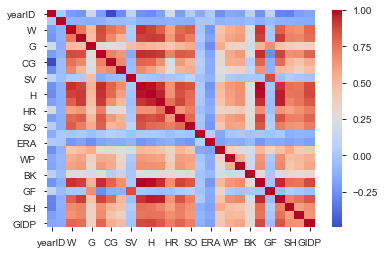

In [9]:
sns.heatmap(df.corr(), cmap='coolwarm')

In [10]:
df._get_numeric_data().head()

,yearID,stint,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,1871,1,1,2,3,3,2,0,0,78,43,23,0,11,1,NaN,7.96,NaN,7,NaN,0,146.0,0,42,NaN,NaN,NaN
1,1871,1,12,15,30,30,30,0,0,792,361,132,4,37,13,NaN,4.50,NaN,7,NaN,0,1291.0,0,292,NaN,NaN,NaN
2,1871,1,0,0,1,0,0,0,0,3,8,3,0,0,0,NaN,27.00,NaN,2,NaN,0,14.0,0,9,NaN,NaN,NaN
3,1871,1,4,16,24,24,22,1,0,639,295,103,3,31,15,NaN,4.35,NaN,20,NaN,0,1080.0,1,257,NaN,NaN,NaN
4,1871,1,0,1,1,1,1,0,0,27,20,10,0,3,0,NaN,10.00,NaN,0,NaN,0,57.0,0,21,NaN,NaN,NaN


In [11]:
pp.ProfileReport(df)

In [12]:
df.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,0,0,78,43,23,0,11,1,NaN,7.96,NaN,7,NaN,0,146.0,0,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,0,0,792,361,132,4,37,13,NaN,4.50,NaN,7,NaN,0,1291.0,0,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,0,0,3,8,3,0,0,0,NaN,27.00,NaN,2,NaN,0,14.0,0,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,1,0,639,295,103,3,31,15,NaN,4.35,NaN,20,NaN,0,1080.0,1,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,0,0,27,20,10,0,3,0,NaN,10.00,NaN,0,NaN,0,57.0,0,21,NaN,NaN,NaN


In [13]:
pitchers_teams = df.groupby(['teamID', 'yearID', 'playerID'])['W','L', 'BB','SO'].sum()

In [14]:
pitchers_teams.reset_index(inplace=True)

In [15]:
pitchers_teams.set_index('yearID', inplace=True)

In [16]:
pitchers_teams.head()

,teamID,playerID,W,L,BB,SO
yearID,,,,,,
1884,ALT,brownji01,1,9,36,39
1884,ALT,connojo01,0,1,5,0
1884,ALT,learyja01,0,3,2,7
1884,ALT,murphjo01,5,6,9,46
1884,ALT,smithge01,0,0,0,1


In [63]:
ladodgers = pitchers_teams[pitchers_teams['teamID'] == 'LAN'].loc[2015:2018].groupby('playerID')

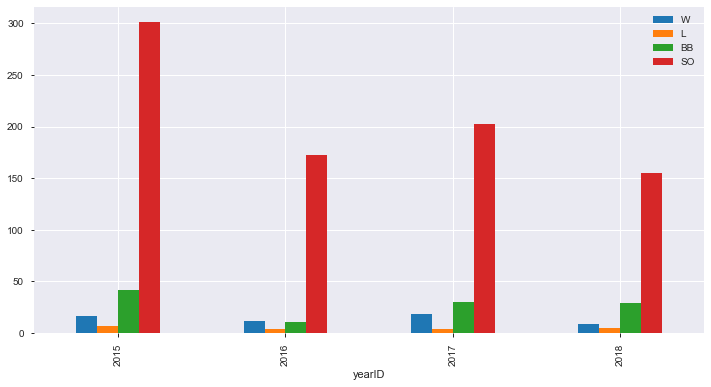

In [66]:
ladodgers.get_group('kershcl01').plot(kind='bar', figsize=(12,6));

In [18]:
cubs_2015_2018 = pitchers_teams[pitchers_teams['teamID'] == 'CHN'].loc[2015:2018].groupby('playerID')

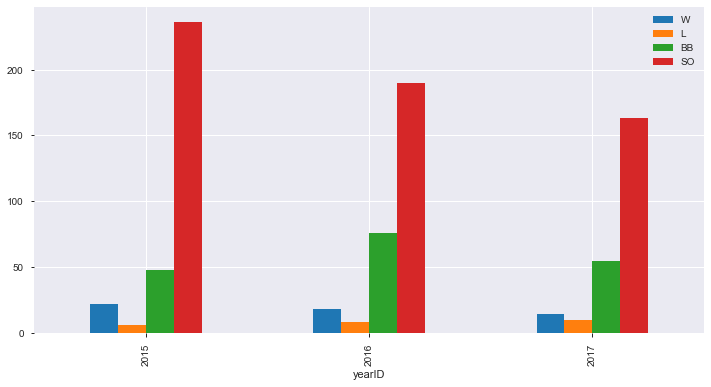

In [43]:
cubs_2015_2018.get_group('arrieja01').plot(kind='bar', figsize=(12,6));

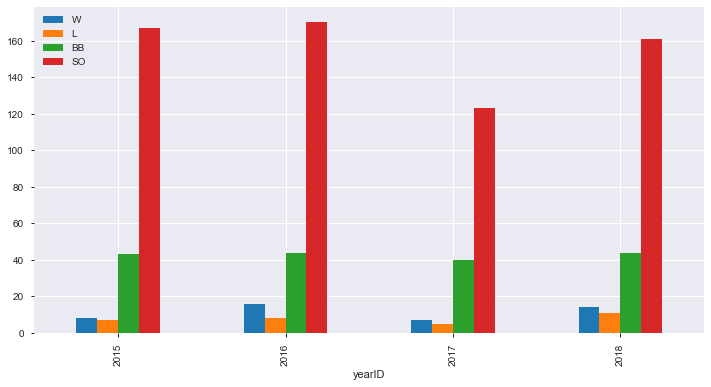

In [47]:
cubs_2015_2018.get_group('hendrky01').plot(kind='bar', figsize=(12,6));